# Challenge 3

In [2]:
# import libraries here
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [37]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [13]:
#your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [14]:
# your code here- numerical variable

numeric = titanic.select_dtypes(["int64","float64"])
numeric.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [15]:
#your code here- categorical variable
classic = titanic.select_dtypes("object")
classic.head()


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [16]:
# your code here
#copia del main
plt.style.use('classic')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

#### Use the appropriate visulalization to show the distribution of the column `Age`

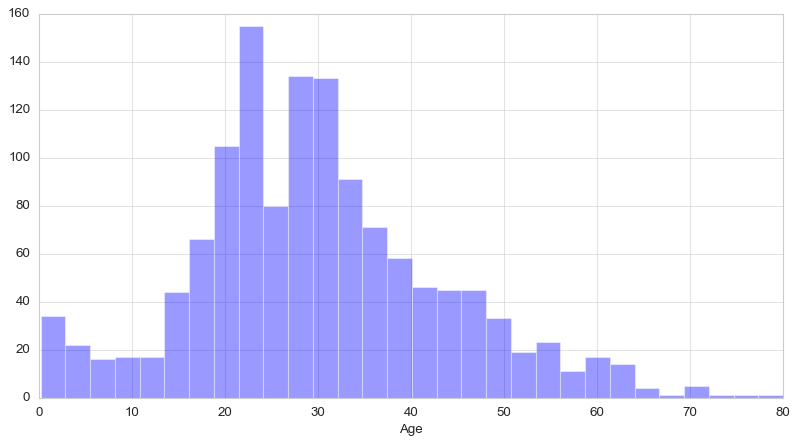

In [17]:
# your code here

sns.distplot(titanic["Age"], kde=False, rug=False)

#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

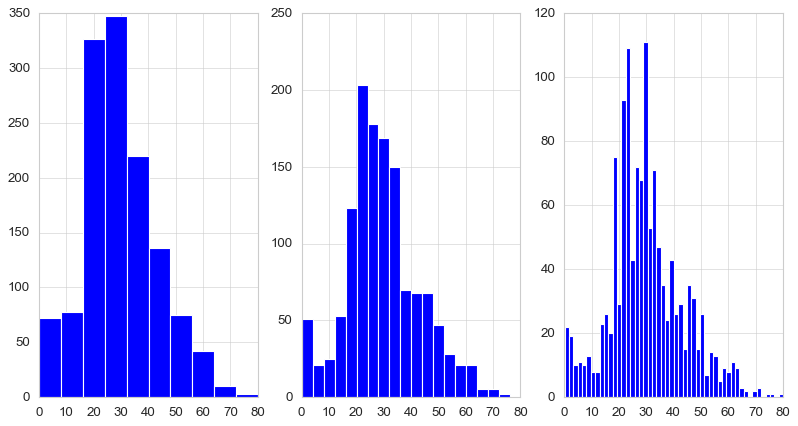

In [18]:
# your code here
plt.subplot(1,3,1)
titanic['Age'].hist(bins=10)
plt.subplot(1,3,2)
titanic['Age'].hist(bins=20)
plt.subplot(1,3,3)
titanic['Age'].hist(bins=50)





#### Whether the bin size affects your plot? Why?

In [19]:
#your comment here


#### Use seaborn to show the distribution of the column `Age`

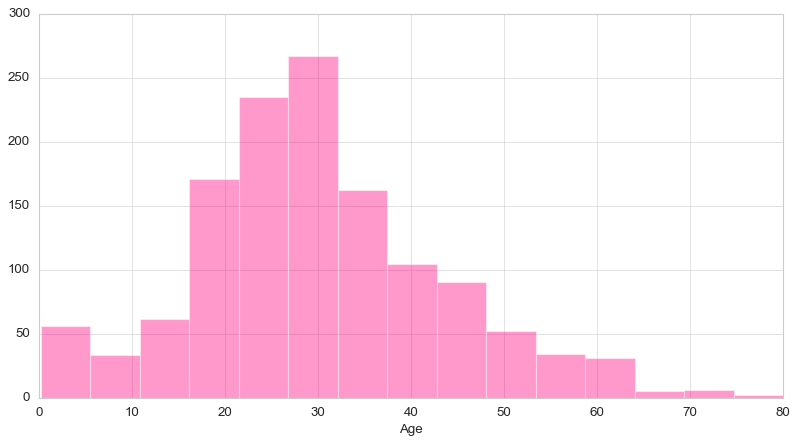

In [20]:
# your code here
sns.distplot(titanic['Age'],bins=15,color='#ff0081',kde=False)

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

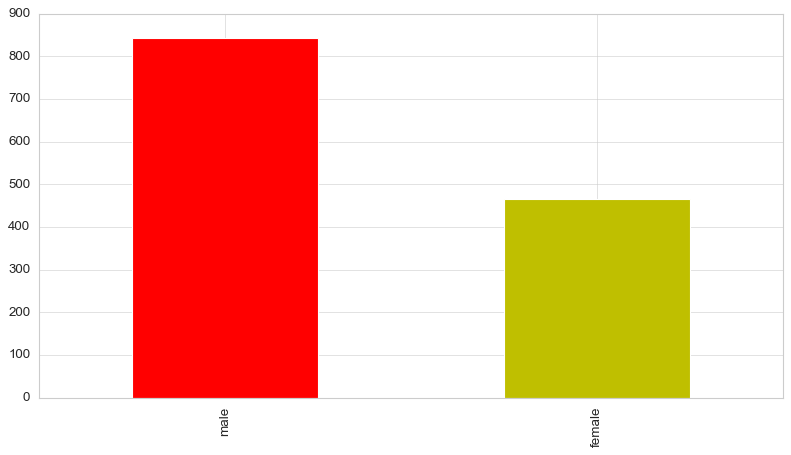

In [27]:
# your code here- 1st way

a = (titanic["Gender"]).value_counts()
a.plot(kind="bar",colors = ("r","y"))

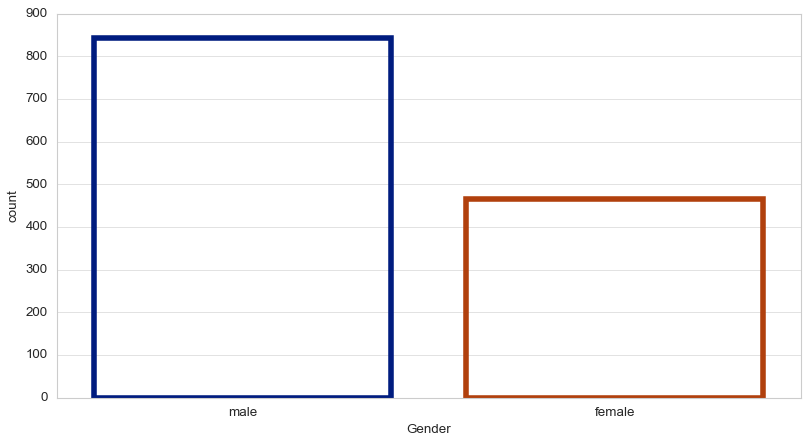

In [43]:
# your code here- 2nd way
sns.countplot(x='Gender',data=titanic,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

#### Use the appropriate plot to visualize the column `Pclass` 


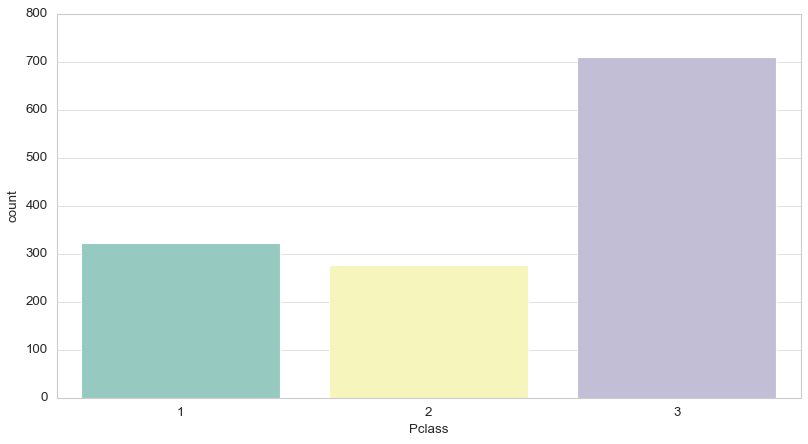

In [44]:
# your code here
ax = sns.countplot(x="Pclass", data=titanic, palette="Set3")

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

In [24]:
# your code here


#### What does the previous plot tell you about the feature `Age`? Comment.

In [15]:
# your comment here


#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

In [16]:
#your code here


#### What additional information in the previous plot provide you about the feature `Age`? Comment.

In [17]:
#your comment here


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

In [18]:
#your code-1st way


In [19]:
# your code-2nd way


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

In [20]:
#your code here


#### According to the previous plot, what are the most correlated feature? Comment.

In [21]:
#your comment here


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

In [22]:
#your code here


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

In [23]:
#your code here
